In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfftn,fftfreq,rfftfreq

In [2]:
L=352 
volume=L**3

#create particles
x,y,z=np.genfromtxt('cluster.txt',usecols=(1,2,3),unpack=True)/1000  #sono in kpc/h!!!, faccio/1000
n_points=len(x)
density=n_points/volume

# %%
n_cells=64 #è un nostro parametro, def fino  ache scala voglio misuare Pk, meglio se è multiplo di 2 per dopo
cell_size=L/n_cells
print("Cell size: ",cell_size) #mpc/h

#compute the mean density
cell_mean_density=n_points/n_cells**3
print("Mean density in the cell: ",cell_mean_density) #mpc**-3/h**3

Cell size:  5.5
Mean density in the cell:  0.0393829345703125


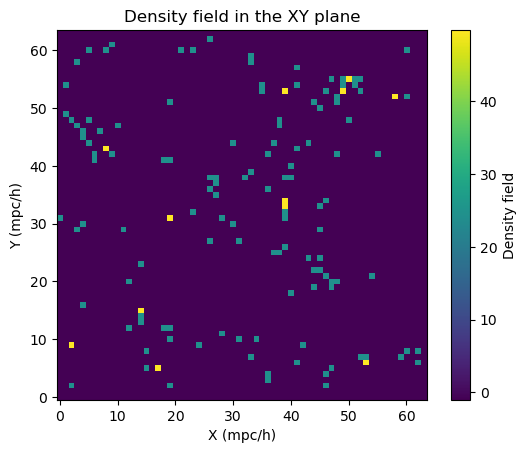

In [3]:
#create density grid with histogramdd
grid,edges=np.histogramdd((x,y,z),bins=(n_cells,n_cells,n_cells),range=((0,L),(0,L),(0,L)))

#compute the density field
density_field=(grid-cell_mean_density)/cell_mean_density 

# %%
plt.imshow(density_field[:,:,0],origin='lower',cmap='viridis')
plt.colorbar(label='Density field')
plt.title('Density field in the XY plane')
plt.xlabel('X (mpc/h)')
plt.ylabel('Y (mpc/h)')
plt.show()

/home/elena/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/elena/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


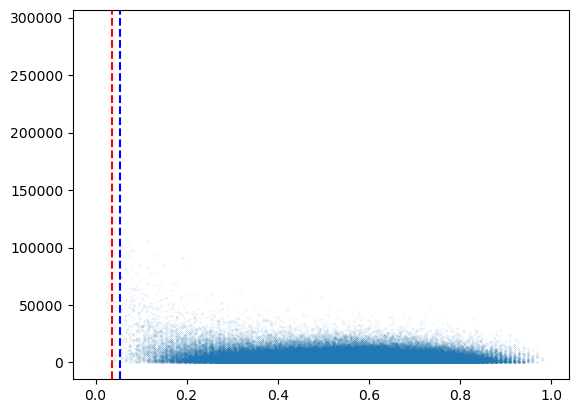

In [4]:
delta_k=rfftn(density_field)/n_cells**3  #normmalizzo per il number di celle  
#è oggetto grande: (64,64,33) e vale che f(-k)=f*(k) e f(k)=f(-k) (coniugato)

#create the k grid
kF=2*np.pi/L  #fondamental frequency in mpc**-1/h
H=L/n_cells
kN=np.pi/H   #Nyquist frequency in mpc**-1/h
kx=fftfreq(n_cells,d=1/n_cells)*kF
ky=fftfreq(n_cells,d=1/n_cells)*kF
kz=rfftfreq(n_cells,d=1/n_cells)*kF

KX,KY,KZ=np.meshgrid(kx,ky,kz)
KK=np.sqrt(KX**2+KY**2+KZ**2)  

#calcolo spettro di pot su griglia
pk_grid=delta_k*np.conjugate(delta_k)*volume  #metto il volume perchè non sono nel continuo ma nel discreto
#ora devo fare binning griglia per avere p(|k|)
#Binning
c=1
k_edges=np.arange(kF,kN,c*kF) 
k_bins=0.5*(k_edges[1:]+k_edges[:-1])

plt.plot(KK.flatten(),pk_grid.flatten(),'.',markersize=0.1)
plt.axvline(k_edges[1], color='red', linestyle='--', label='kF')
plt.axvline(k_edges[2], color='blue', linestyle='--', label='kN')
plt.show()

/tmp/ipykernel_85405/2084724816.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  pk_averaged[i]=np.mean(pk_grid.flatten()[mask])


k_bins:  0.026774937388549372
k_bins:  0.04462489564758229
k_bins:  0.0624748539066152
k_bins:  0.08032481216564813
k_bins:  0.09817477042468103
k_bins:  0.11602472868371395
k_bins:  0.13387468694274687
k_bins:  0.15172464520177978
k_bins:  0.16957460346081268
k_bins:  0.18742456171984562
k_bins:  0.20527451997887852
k_bins:  0.22312447823791143
k_bins:  0.24097443649694433
k_bins:  0.2588243947559773
k_bins:  0.2766743530150102
k_bins:  0.2945243112740431
k_bins:  0.312374269533076
k_bins:  0.3302242277921089
k_bins:  0.3480741860511418
k_bins:  0.3659241443101748
k_bins:  0.3837741025692077
k_bins:  0.4016240608282406
k_bins:  0.4194740190872735
k_bins:  0.4373239773463064
k_bins:  0.45517393560533936
k_bins:  0.47302389386437227
k_bins:  0.4908738521234052
k_bins:  0.5087238103824381
k_bins:  0.5265737686414711
k_bins:  0.5444237269005039


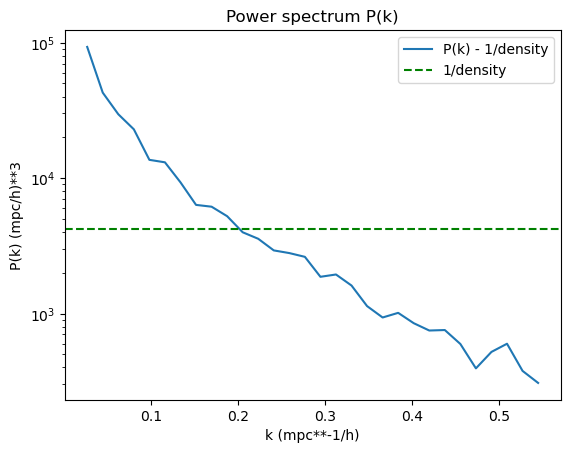

In [5]:
pk_averaged=np.zeros(k_bins.shape)
k_averaged=np.zeros(k_bins.shape)

for i in range(len(k_bins)):
    mask=(KK.flatten()>=k_edges[i]) & (KK.flatten()<k_edges[i+1])
    pk_averaged[i]=np.mean(pk_grid.flatten()[mask])
    k_averaged[i]=np.mean(KK.flatten()[mask])
    print("k_bins: ",k_bins[i])
    
plt.semilogy(k_bins,pk_averaged-1./density,label='P(k) - 1/density')
plt.axhline(1./density, color='green', linestyle='--', label='1/density')
plt.xlabel('k (mpc**-1/h)')
plt.ylabel('P(k) (mpc/h)**3')
plt.title('Power spectrum P(k)')
plt.legend()
plt.show()